In [0]:
import matplotlib.pyplot as plt
import requests
import time
import numpy as np

In [0]:
player_list = [87097938]

In [0]:
def get_match_list(player_list):
  match_list = []
  for player in player_list:
    matches = requests.get('https://api.opendota.com/api/players/'+ str(player) + '/matches').json()
    for match in matches[0:60]: #get latests matches
      match_list.append(match['match_id'])

  return match_list

In [0]:
def get_match_data(match_id):
  return requests.get('https://api.opendota.com/api/matches/'+str(match_id)).json()

In [0]:
def get_ward_position(match_id):
  ward_list_radiant = []
  ward_list_dire = []
  match_data = get_match_data(match)
  try:
    for player_data in match_data['players']:
      for ward_data in player_data['obs_log']:
        if ward_data['time']<300:          
          if player_data['player_slot']<5:
              ward_list_radiant.append([ward_data['x'],ward_data['y']])
          else:
              ward_list_dire.append([ward_data['x'],ward_data['y']])
  except:
    pass

  return ward_list_radiant, ward_list_dire

In [0]:
matches = get_match_list(player_list)
ward_list_radiant = []
ward_list_dire = []

for match in matches:
  WL_rad, WL_dire = get_ward_position(match)
  ward_list_radiant.extend(WL_rad)
  ward_list_dire.extend(WL_dire)

ward_array_radiant = np.asarray(ward_list_radiant)
ward_array_dire = np.asarray(ward_list_dire)

In [0]:
ward_array_radiant, radiant_size = np.unique(ward_array_radiant, return_counts=True, axis=0)
ward_array_dire, dire_size = np.unique(ward_array_dire, return_counts=True, axis=0)

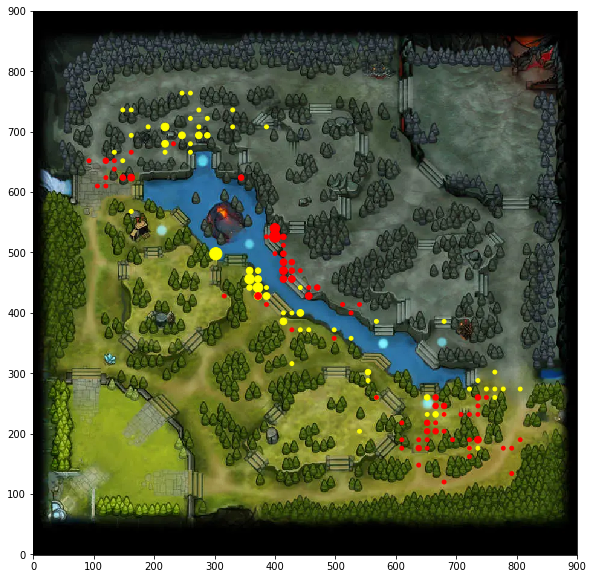

In [8]:
plt.figure(figsize=(10,10))
img = plt.imread('MAPA.png')
plt.imshow(img, origin='lower')
plt.scatter(x=[-440 + i*7 for i in ward_array_radiant[:,0]],y=[-440 + i * 7 for i in ward_array_radiant[:,1]], s=15*radiant_size, c='yellow')
plt.scatter(x=[-440 + i*7 for i in ward_array_dire[:,0]],y=[-440 + i * 7 for i in ward_array_dire[:,1]], s=15*dire_size, c='red')